In [1]:
import MDAnalysis as mda
import nglview
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt


Chargement et analyse du log : simulation_log.dat
✅ Aperçu des données de log :


,Time(ps),Step,E_pot,E_kin,Temp(K)
0,0.00,0,-125.827760,239.456448,295.3846
1,0.00,0,-126.077613,239.589976,295.5493
2,0.01,10,-129.837226,243.344180,300.1804
3,0.02,20,-134.048604,247.566315,305.3886
4,0.03,30,-149.134648,262.615875,323.9532


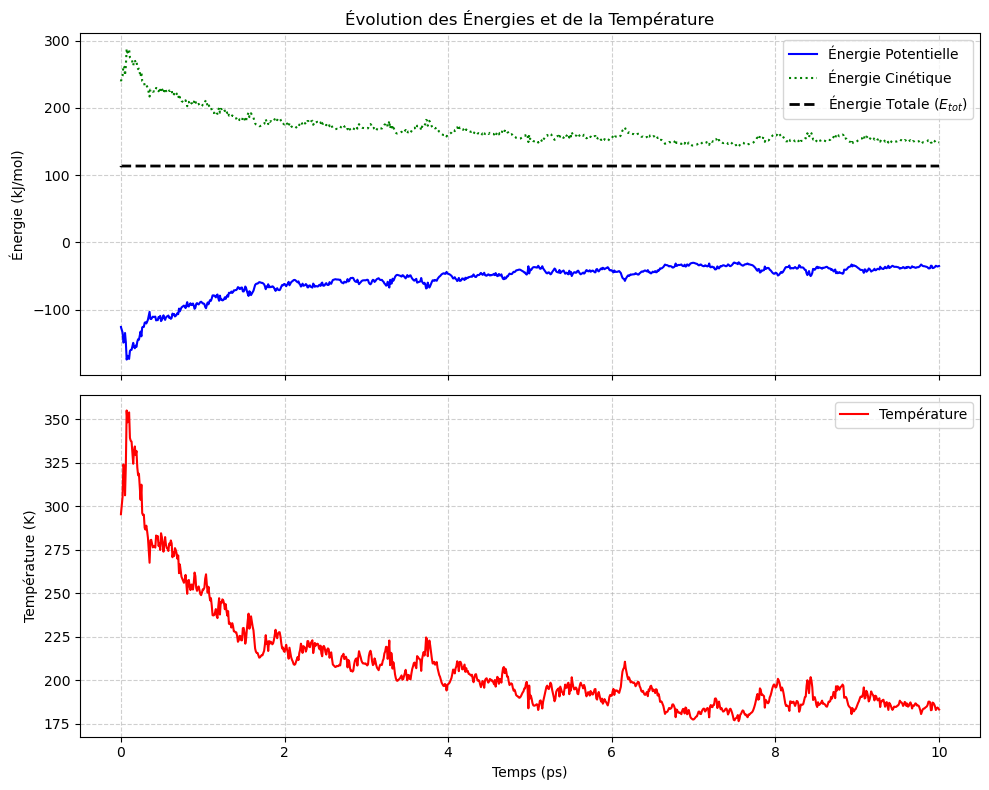


--- 📈 Résultat de la Dérive NVE (Conservation) ---
Énergie Totale Initiale : 113.629 kJ/mol
Énergie Totale Finale : 113.503 kJ/mol
Dérive Absolue (Initial vs Final) : 0.110222 %
Amplitude Max. de Fluctuation (E_max - E_min) : 0.222551 kJ/mol
--------------------------------------------------
❌ Dérive trop élevée. Vérifiez le pas de temps ($\Delta t$) et la double précision.


In [20]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
# NOTE: Vous devez ajouter les imports pour MDAnalysis et NGLView ici
import MDAnalysis as mda 
import nglview

# --- Configuration ---
LOG_FILE_PATH = "simulation_log.dat" # Chemin vers le fichier de log

# ----------------------------------------------------------------------
## I. ANALYSE DU FICHIER DE LOG (Énergies et Température)
# ----------------------------------------------------------------------

if os.path.exists(LOG_FILE_PATH):
    print(f"\nChargement et analyse du log : {LOG_FILE_PATH}")
    
    try:
        COL_NAMES = ['Time(ps)', 'Step', 'E_pot', 'E_kin', 'Temp(K)']
        
        df = pd.read_csv(
            LOG_FILE_PATH,
            sep=r'\s+', # Correction: utilisation de r'\s+'
            comment='#',
            header=None,
            names=COL_NAMES,
            skiprows=1 
        )
        
        print("✅ Aperçu des données de log :")
        display(df.head())
        
        # --- Calcul et Tracé des Résultats (Énergies & Température) ---
        time_ps = pd.to_numeric(df['Time(ps)'], errors='coerce')
        e_pot = pd.to_numeric(df['E_pot'], errors='coerce') 
        e_kin = pd.to_numeric(df['E_kin'], errors='coerce') 
        temp_k = pd.to_numeric(df['Temp(K)'], errors='coerce')
        e_total = e_pot + e_kin
        
        fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)
        
        axes[0].plot(time_ps, e_pot, label='Énergie Potentielle', color='blue', linewidth=1.5)
        axes[0].plot(time_ps, e_kin, label='Énergie Cinétique', color='green', linestyle=':', linewidth=1.5)
        axes[0].plot(time_ps, e_total, label='Énergie Totale ($E_{tot}$)', color='black', linestyle='--', linewidth=2)
        axes[0].set_ylabel('Énergie (kJ/mol)')
        axes[0].set_title('Évolution des Énergies et de la Température')
        axes[0].legend()
        axes[0].grid(True, linestyle='--', alpha=0.6)
        
        axes[1].plot(time_ps, temp_k, label='Température', color='red', linewidth=1.5)
        axes[1].set_ylabel('Température (K)')
        axes[1].set_xlabel('Temps (ps)')
        axes[1].grid(True, linestyle='--', alpha=0.6)
        axes[1].legend()

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Erreur lors du traitement des données de log avec Pandas: {e}")

# --- Calcul de l'Énergie Totale ---
# E_total a déjà été calculé : e_total = e_pot + e_kin

# Énergie Totale Initiale (premier pas de la simulation)
E_tot_initial = e_total.iloc[0]

# Énergie Totale Finale (dernier pas de la simulation)
E_tot_final = e_total.iloc[-1]

# Amplitude de la Dérive Absolue (différence absolue entre final et initial)
# On utilise abs() pour s'assurer que la valeur est positive, et on compare
# avec la valeur initiale pour obtenir le pourcentage de perte/gain.
drift_absolute_perc = (abs(E_tot_final - E_tot_initial) / abs(E_tot_initial)) * 100

# Amplitude Totale de la Fluctuation (Max - Min, pour une autre perspective de qualité)
max_drift_amplitude = e_total.max() - e_total.min()

print("\n--- 📈 Résultat de la Dérive NVE (Conservation) ---")
print(f"Énergie Totale Initiale : {E_tot_initial:.3f} kJ/mol")
print(f"Énergie Totale Finale : {E_tot_final:.3f} kJ/mol")
print(f"Dérive Absolue (Initial vs Final) : {drift_absolute_perc:.6f} %")
print(f"Amplitude Max. de Fluctuation (E_max - E_min) : {max_drift_amplitude:.6f} kJ/mol")
print("--------------------------------------------------")

if drift_absolute_perc < 0.1:
    print("👍 Conservation de l'énergie acceptable (< 0.1% de dérive absolue).")
else:
    print(r"❌ Dérive trop élevée. Vérifiez le pas de temps ($\Delta t$) et la double précision.")

In [21]:
import MDAnalysis as mda
import nglview as nv
from IPython.display import display
import os

# --- Configuration ---
XYZ_FILE_PATH = "trajectory_output.xyz" 

if os.path.exists(XYZ_FILE_PATH):
    try:
        # 1. CHARGEMENT DE L'UNIVERS
        universe = mda.Universe(XYZ_FILE_PATH, format='xyz', guess_vmd=True) 
        
        if len(universe.atoms) == 65:
            
            print("Topologie forcée : 1 C (index 0) et 64 H (indices 1:64).")
            
            # 2. CRÉATION DE LA VUE NGLView
            view = nv.show_mdanalysis(universe)
            
            # 3. SUPPRESSION DES REPRÉSENTATIONS PAR DÉFAUT
            view.clear_representations()
            
            # 4. 🎨 AFFICHAGE BASIQUE (UNE SEULE LIGNE)
            view.add_representation(
                'spacefill', 
                selection='all', 
                radius=0.15,
                color_scheme='element',  # CLÉ : Coloration automatique par l'élément
                name='Atomes_Basiques'
            )
            
            # Afficher l'Unité Cellulaire

            # Afficher le lecteur/visualisateur
            display(view) 
            
        else:
            print(f"Le nombre d'atomes est {len(universe.atoms)}. Vérifiez le fichier XYZ.")
            
    except Exception as e:
        print(f"Erreur lors du chargement ou de la visualisation: {e}")
else:
    print(f"Erreur : Fichier de trajectoire non trouvé à l'emplacement : {XYZ_FILE_PATH}")

Topologie forcée : 1 C (index 0) et 64 H (indices 1:64).


NGLWidget(max_frame=1001)